In [1]:
from numpy import genfromtxt
import re
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import csv
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def isfloat(value):
  try:
    float(value)
    return True
  except ValueError:
    return False

In [3]:
def isint(value):
  try:
    int(value)
    return True
  except ValueError:
    return False

In [4]:
#https://www.kaggle.com/reubencpereira/spatial-data-repo
text_file = open("kivaData_augmented.txt", "r", encoding="utf8")
lines = text_file.read().split('\n')
text_file.close()
arr = []
for l in  csv.reader(lines, quotechar='"', delimiter=',', quoting=csv.QUOTE_ALL, skipinitialspace=True):
    if(len(l)>2):
        #Filter für nicht vorhandene Werte!
        if(#isfloat(l[2]) 
           #& isfloat(l[3])
             isfloat(l[26]) #Niederschlag
           & isint(l[29]) #Landnutzungsklassifikator
           & isint(l[31]) #Temperatur
          # & isint(l[30]) #Höhenwerte
          # & isint(l[27]) #Reisezeit bis zur nächsten Großstadt in Stunden
          # & isint(l[28]) #Durchschnittliche nächtliche Beleuchtungszeit (Reflektionsgrade 1-63)
          # & isfloat(l[25])#Populationsdichte (Bewohner pro Quadratkilometer)
                            ): 
            arr.append(l)
        elif(l[0]=="region"):
            arr.append(l)

In [5]:
#In numpy-Array umwandeln und die Legende entfernen
data = np.empty([len(arr)-1,len(arr[0])],dtype=object)
for l in range(1,len(arr)):
        data[l-1] = arr[l]

In [6]:
#Index Legende:
for i in range(0,43):
    print("Index "+str(i)+": "+str(arr[0][i]))

Index 0: region
Index 1: country
Index 2: latitude
Index 3: longitude
Index 4: id
Index 5: funded_amount
Index 6: loan_amount
Index 7: activity
Index 8: sector
Index 9: use
Index 10: country_code
Index 11: currency
Index 12: partner_id
Index 13: posted_time
Index 14: disbursed_time
Index 15: funded_time
Index 16: term_in_months
Index 17: lender_count
Index 18: tags
Index 19: borrower_genders
Index 20: repayment_interval
Index 21: date
Index 22: location_type
Index 23: latlngImputed
Index 24: useforspatial
Index 25: popDensity
Index 26: precipitation
Index 27: TimeToCity
Index 28: AvgNightLight
Index 29: LandClassification
Index 30: Elevation
Index 31: Temperature
Index 32: Evaporation
Index 33: Modis_LAI
Index 34: Modis_EVI
Index 35: soil_orgc
Index 36: soil_phaq
Index 37: soil_clay
Index 38: soil_silt
Index 39: soil_sand
Index 40: Conflicts_total
Index 41: Conflicts_totalDeaths
Index 42: Conflicts_totalDeathsCivilians


In [7]:
data[:,29] #Daten eines Attributs

array(['20', '20', '20', ..., '20', '110', '110'], dtype=object)

In [8]:
###########################################################################################
###########################################################################################
###########################################################################################
#Anderer Datensatz mit mehr Punkten, aber weniger Dimensionen
#http://download.geonames.org/export/zip/
###########################################################################################
###########################################################################################
###########################################################################################
text_file = open("allCountries.txt", "r", encoding="utf8")
ac_lines = text_file.read().split('\n')
text_file.close()
geonames = np.empty([np.size(ac_lines)-1,np.size(ac_lines[0].split('\t'))],dtype=object)
for i in range(0,np.size(ac_lines)-1):
    geonames[i] = ac_lines[i].split('\t')

In [9]:
geonames.shape

(1264940, 12)

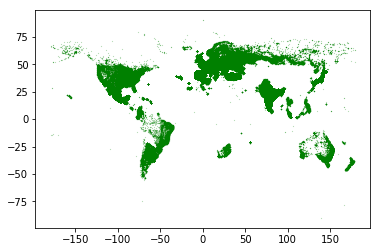

In [10]:
weltplot = plt.plot(geonames[0:,10].astype(float), geonames[0:,9].astype(float), 'g.')
plt.setp(weltplot, markersize=0.2)
plt.show()

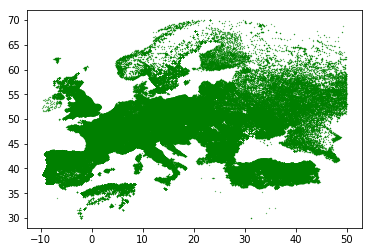

In [11]:
#Ausschnitt betrachten:
breitengrad = geonames[0:,9].astype(float)
laengengrad = geonames[0:,10].astype(float)
condition = [(breitengrad>30) & (breitengrad <70) & (laengengrad>-10) & (laengengrad <50)]
cond_a = np.extract(condition, breitengrad)
cond_b = np.extract(condition, laengengrad)
euplot = plt.plot(cond_b,cond_a, 'g.')
plt.setp(euplot, markersize=0.5)
plt.show()
###########################################################################################
###########################################################################################
###########################################################################################

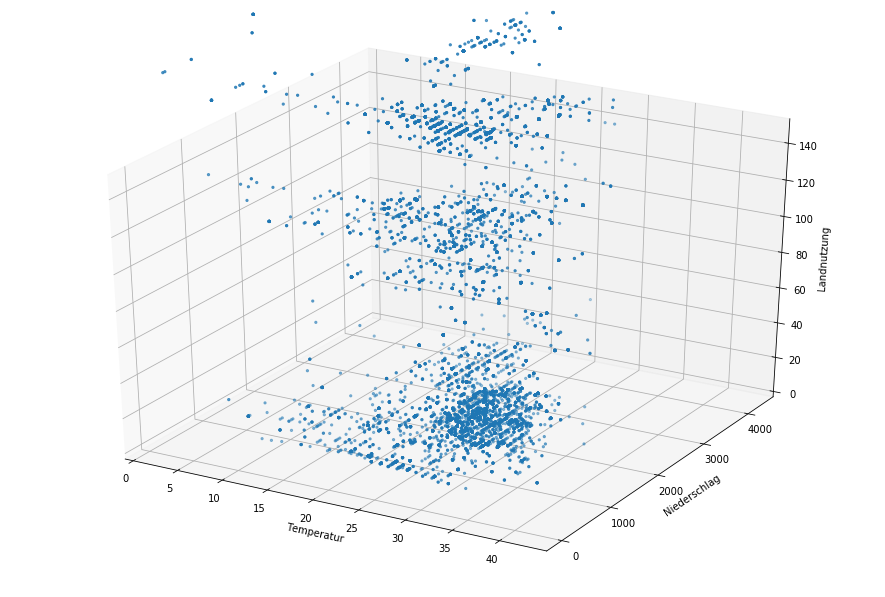

In [12]:
fig = plt.figure(figsize=(12,8)) 
ax = Axes3D(fig)

sequence_containing_y_vals = data[:,26][0::50].astype(float) 
sequence_containing_z_vals = data[:,29][0::50].astype(int) 
sequence_containing_x_vals = data[:,31][0::50].astype(int)

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals,s=5)
ax.set_ylabel('Niederschlag')
ax.set_zlabel('Landnutzung')
ax.set_xlabel('Temperatur')

#ax.set_xlim(0,35)
#ax.set_ylim(20,40)
ax.set_zlim(0,150)

plt.show()

#Endlich eine deutliche Clusterbildung zu erkennen!

In [ ]:
#Local Outlier Factor

In [ ]:
#NSCABDT

In [ ]:
#CFGWC

In [ ]:
#cOpt mit Fuzzy Hypervolume

In [ ]:
#VAT?

In [ ]:
#Rand-Index

In [ ]:
#Partitionierungsstabilität